<a href="https://colab.research.google.com/github/lukystrikeibg/Curso_de_PostgreSQL_Aplicado_a_Ciencia_de_Datos/blob/master/datos_rutine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cambio de temperatura con datos del banco Mundial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib

In [ ]:
 from google.colab import drive
drive.mount('/content/drive' )

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/manipulación de datos/db/world bank'
!ls

/content/drive/My Drive/Colab Notebooks/manipulación de datos/db/world bank
'agua potable.csv'
'consumo de energia.csv'
'energias producida por hidroelectricas.csv'
 energias_renovables_producida.csv
 GlobalLandTemperaturesByCountry.csv
 poblacion_total.csv


In [ ]:
 df_climate=pd.read_csv('GlobalLandTemperaturesByCountry.csv')
 df_agua=pd.read_csv('agua potable.csv')
df_power=pd.read_csv('consumo de energia.csv')
 df_hydro=pd.read_csv('energias producida por hidroelectricas.csv')
 df_pwgreen=pd.read_csv('energias_renovables_producida.csv')
 df_pople=pd.read_csv('poblacion_total.csv')

In [ ]:
df_agua.xs(43)

Country Name                                               Colombia
Country Code                                                    COL
Indicator Name    Extracción anual de agua dulce para uso agríco...
Indicator Code                                       ER.H2O.FWAG.ZS
1960                                                            NaN
                                        ...                        
2017                                                            NaN
2018                                                            NaN
2019                                                            NaN
2020                                                            NaN
Unnamed: 65                                                     NaN
Name: 43, Length: 66, dtype: object

In [ ]:
df_agua.sample(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
12,Austria,AUT,Extracción anual de agua dulce para uso agríco...,ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.693,NaN,NaN,NaN,NaN,5.587,NaN,NaN,NaN,NaN,2.627,NaN,NaN,NaN,NaN,NaN,NaN,2.7440,NaN,NaN,NaN,NaN,2.7260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Extracción anual de agua dulce para uso agríco...,ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Emiratos Árabes Unidos,ARE,Extracción anual de agua dulce para uso agríco...,ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.79,NaN,NaN,NaN,NaN,78.480,NaN,NaN,NaN,NaN,82.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Islas del Canal,CHI,Extracción anual de agua dulce para uso agríco...,ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,Países menos desarrollados: clasificación de l...,LDC,Extracción anual de agua dulce para uso agríco...,ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.050000,91.82,NaN,NaN,NaN,NaN,NaN
40,Camerún,CMR,Extracción anual de agua dulce para uso agríco...,ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.35,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Samoa Americana,ASM,Extracción anual de agua dulce para uso agríco...,ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Bhután,BTN,Extracción anual de agua dulce para uso agríco...,ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,Tailandia,THA,Extracción anual de agua dulce para uso agríco...,ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,México,MEX,Extracción anual de agua dulce para uso agríco...,ER.H2O.FWAG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.2700,NaN,NaN,NaN,NaN,76.720,NaN,NaN,NaN,NaN,76.570,NaN,NaN,76.300000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  object        
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
 4   year                           577462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.0+ MB


In [ ]:
df_climate['year']=pd.to_datetime(df_climate['dt'])

In [ ]:
 idx = df_climate['year'] > pd.to_datetime('1970-01-01')
df_climate = df_climate[idx]
df_climate

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [ ]:
df_t_avg=df_climate.groupby(['Country',
                 pd.Grouper(key='year', freq= '1y')]).agg({'AverageTemperature':[np.mean,np.median]})
df_t_avg.sample()

AverageTemperature        
                                  mean  median
Country  year                                 
Zimbabwe 1982-12-31          21.574917  22.354

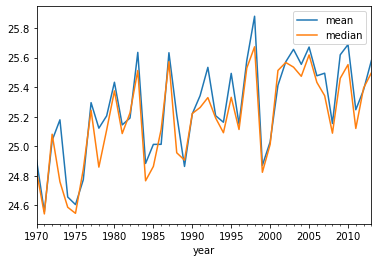

In [ ]:
df_t_avg.xs('Colombia')['AverageTemperature'].plot()

In [ ]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [ ]:
df_t_med.rename(columns={'median':'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970.0
1,Afghanistan,1971-12-31,14.9340,1971.0
2,Afghanistan,1972-12-31,13.8725,1972.0
3,Afghanistan,1973-12-31,14.9130,1973.0
4,Afghanistan,1974-12-31,13.6160,1974.0
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009.0
10688,Åland,2010-12-31,4.7550,2010.0
10689,Åland,2011-12-31,7.4990,2011.0
10690,Åland,2012-12-31,6.2540,2012.0


In [ ]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')

In [ ]:
range(1971,2015)
map(str,range(1971,2015))
cols=['Country Name', 'Country Code']+list(map(str,range(1971,2015)))
cols[:10]

['Country Name',
 'Country Code',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978']

In [ ]:
df_power=df_power.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'energia ppc'})

In [ ]:
def fun_format(df, col = 'energia'):
    return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
      columns={'variable':'date',
              'Country Name':'Country',
              'Country Code':'name',
              'value':col})

In [ ]:
df_hydro=df_hydro.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'hydroelect'})

In [ ]:
df_pople=df_pople.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'poblacion'})

In [ ]:
df_t_med['date']= df_t_med['date'].astype(float)
df_pople['date']= df_pople['date'].astype(float)
df_power['date']= df_power['date'].astype(float)
df_hydro['date']= df_hydro['date'].astype(float)

In [ ]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  11616 non-null  object 
 1   name     11616 non-null  object 
 2   date     11616 non-null  object 
 3   energia  7344 non-null   float64
dtypes: float64(1), object(3)
memory usage: 363.1+ KB


In [ ]:
df_merge=pd.merge(df_merge,df_power, on =['Country', 'name', 'date'], how= 'inner')
df_merge=pd.merge(df_merge,df_hydro, on =['Country', 'name', 'date'], how= 'inner')

In [ ]:
df_merge.drop(['hydroelect_x','energia_y'],axis=1)

,Country,temperature,date,name,poblacion,energia_x,energia,energia ppc,hydroelect_y
0,Afghanistan,14.9340,1971.0,AFG,11475445.0,NaN,NaN,NaN,NaN
1,Afghanistan,13.8725,1972.0,AFG,11791215.0,NaN,NaN,NaN,NaN
2,Afghanistan,14.9130,1973.0,AFG,12108963.0,NaN,NaN,NaN,NaN
3,Afghanistan,13.6160,1974.0,AFG,12412950.0,NaN,NaN,NaN,NaN
4,Afghanistan,13.5130,1975.0,AFG,12689160.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009.0,ZWE,12526968.0,585.456912,585.456912,585.456912,57000000.0
7220,Zimbabwe,23.3040,2010.0,ZWE,12697723.0,606.644199,606.644199,606.644199,94000000.0
7221,Zimbabwe,22.9420,2011.0,ZWE,12894316.0,636.249337,636.249337,636.249337,131000000.0
7222,Zimbabwe,23.0455,2012.0,ZWE,13115131.0,608.762505,608.762505,608.762505,168000000.0
